In [169]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [619]:
park_df=pd.read_csv('parkinsons.csv')
park_df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [620]:
#2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
#number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

Afterwards we have to convert object into categorical number since decision tree can't be operated on object/strings.

In [622]:
#We have to convert strings to numbers
for feature in park_df.columns: # Loop through all columns in the dataframe
    if park_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        park_df[feature] = pd.Categorical(park_df[feature]).codes # Replace strings with an integer
park_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


From above information we get:
Types of Variables
1. Variable Identification: Target (Status) & Predictors (remaining all columns)
2. Data types: They are mentioned as above
3. Variable category: Categorical: status, Continuous: Rest all except name


In [623]:
#3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as 
#central values, spread, tails etc. What are your observations? (15 points)

#The first step is to check the distribution statistics. 
park_df.describe()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,97.000000,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,56.435804,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,0.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,48.500000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,97.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,145.500000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,194.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


From above we can see that the spread for varibales 'MDVP:Fo(Hz),	MDVP:Fhi(Hz),	MDVP:Flo(Hz)' is considerably large.

   status  count      prop
0       1    147  0.753846
1       0     48  0.246154


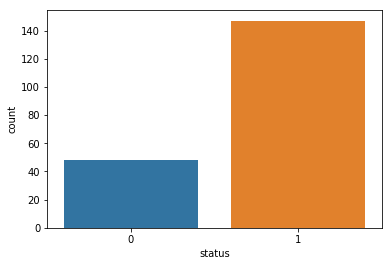

In [624]:
## Target Variable Frequency Distribution
freq = park_df['status'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(park_df['status'])

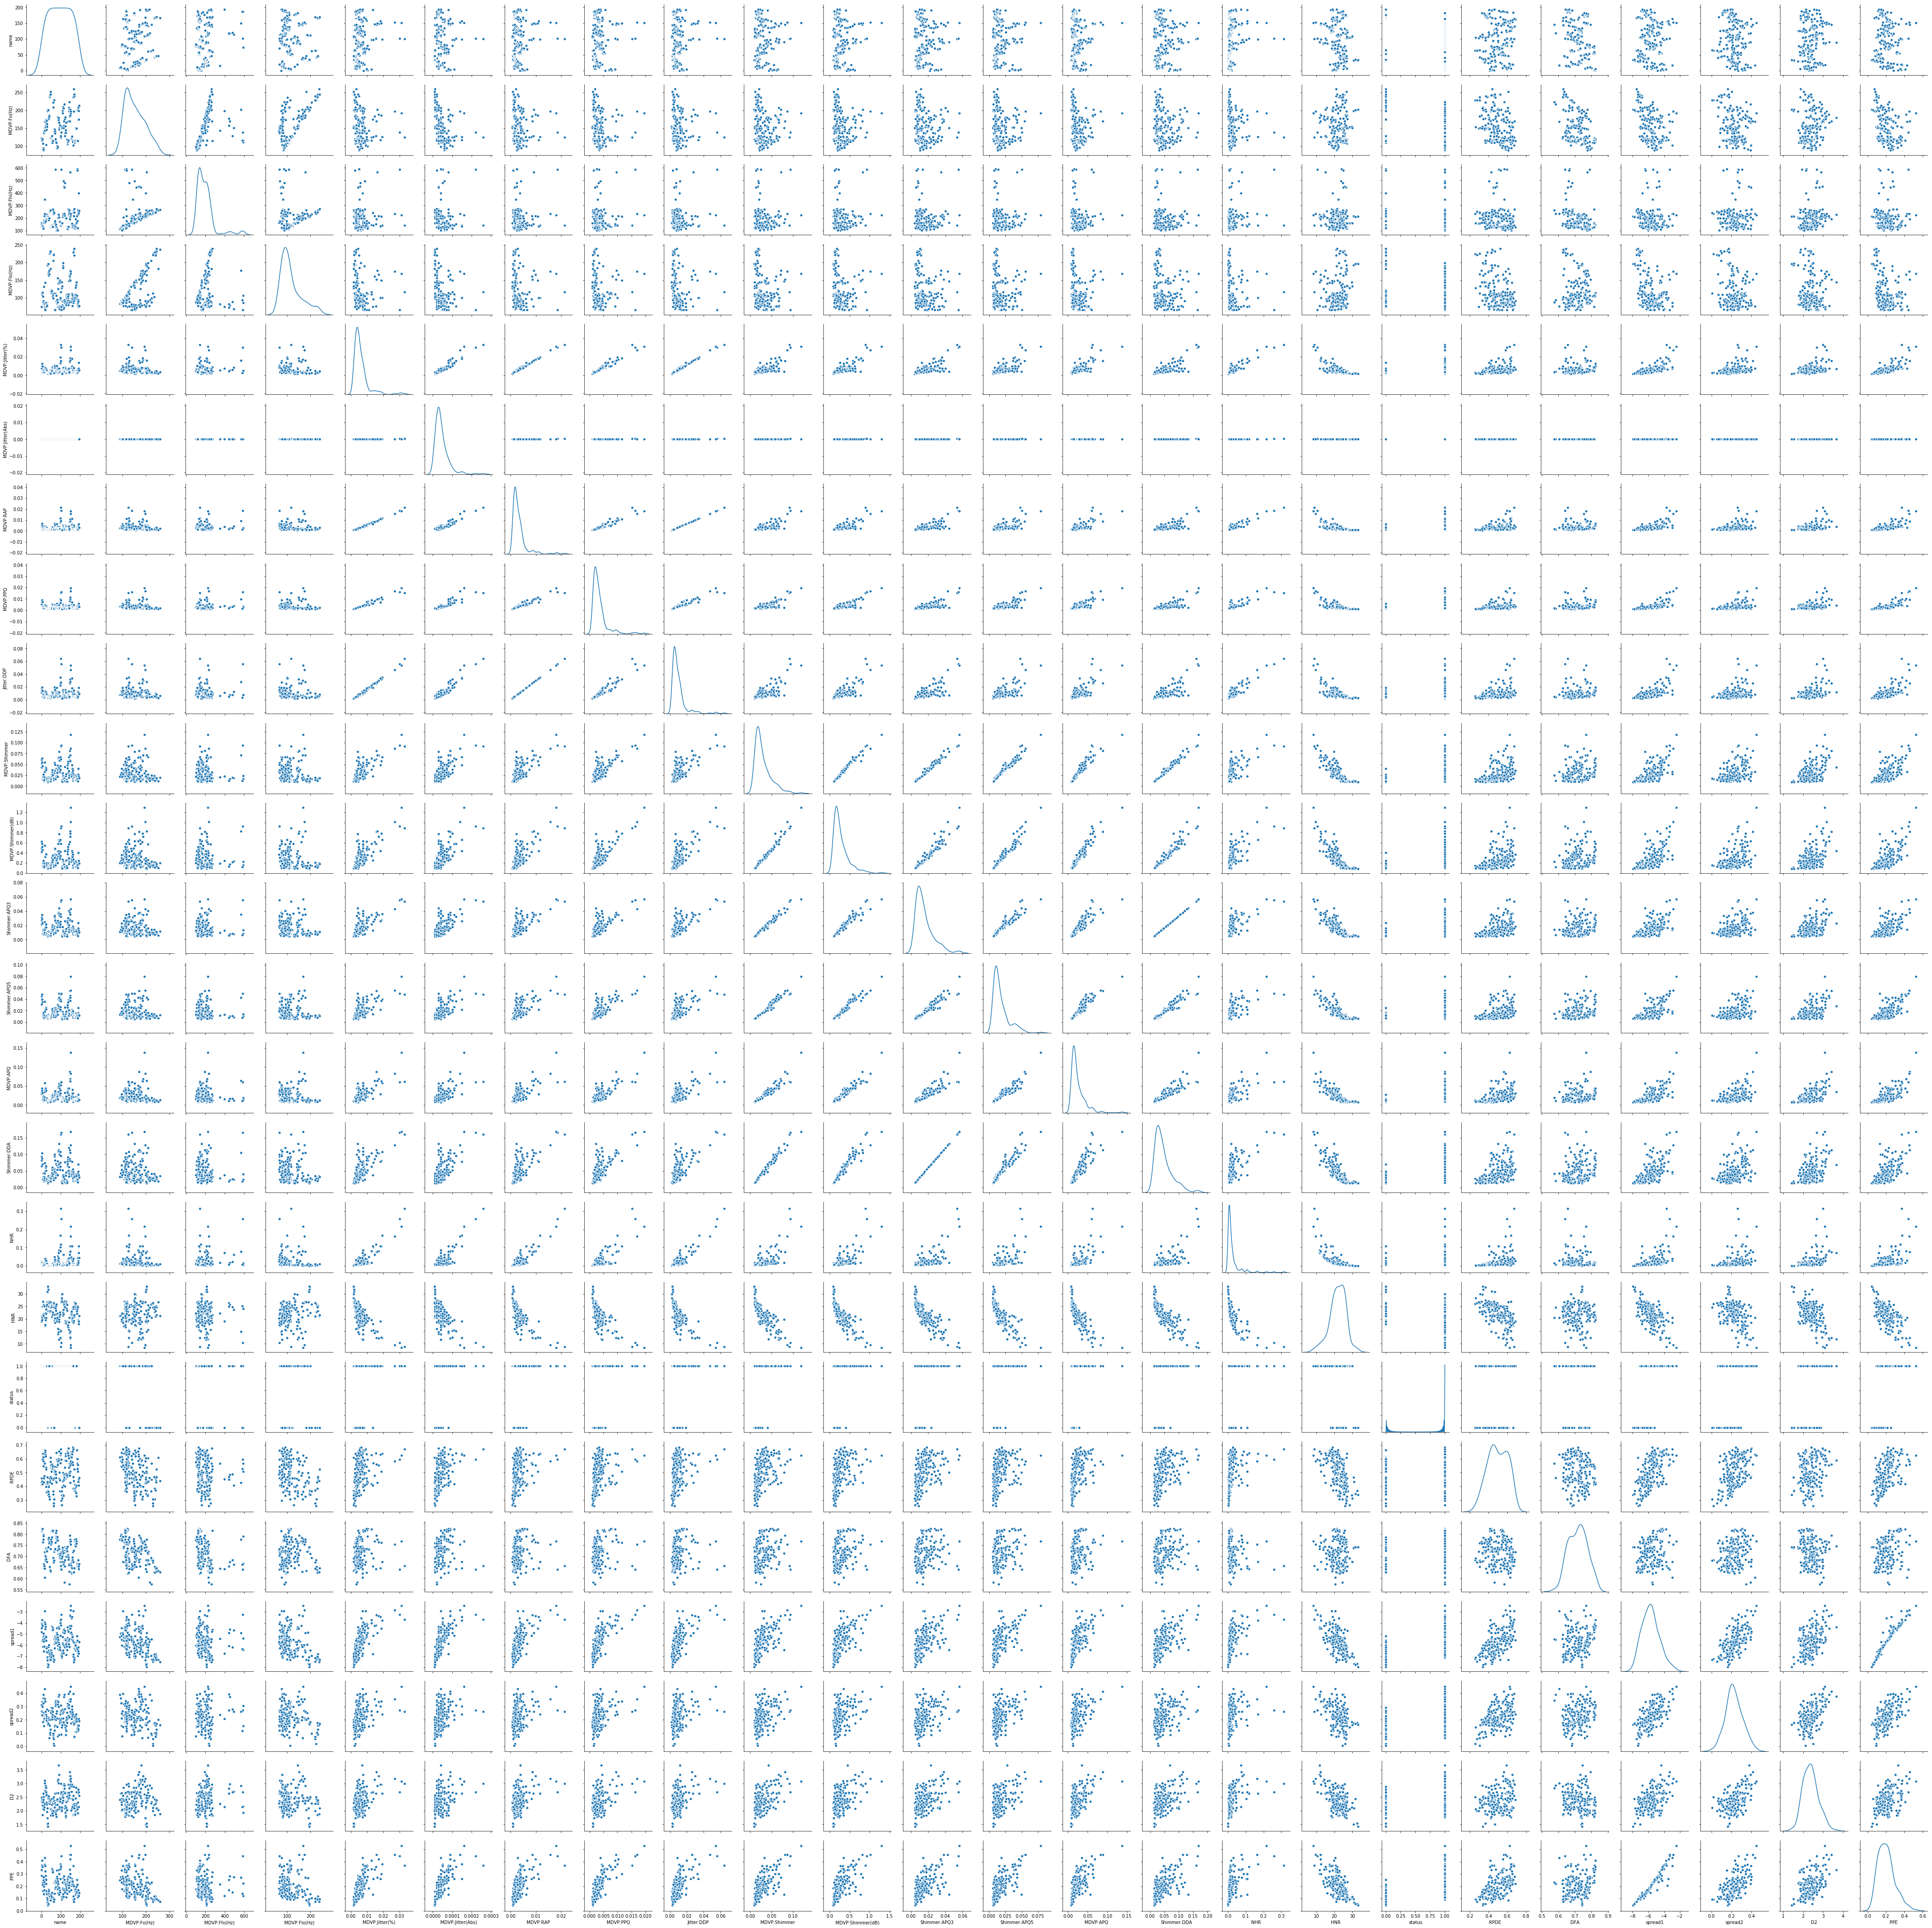

In [625]:
#Checking the relationship of all the independent/predicted variables using scatter plot/pairplot
sns.pairplot(park_df,diag_kind='kde')

From above pair plot we can see that (if we zoom) upto NHR the plots are skewed. Hence, there are outliers present in them. But since decision making trees are robust to outliers so no need to remove them.

The pairplot also shows that there are high correlated variables. So, let's plot correlation matrix and do a bivariate analysis using scatter plot.

In [626]:
mat_cor=park_df.corr()
mat_cor[mat_cor>0.93]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fo(Hz),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fhi(Hz),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),NaN,NaN,NaN,NaN,1.000000,0.935714,0.990276,0.974256,0.990276,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(Abs),NaN,NaN,NaN,NaN,0.935714,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:RAP,NaN,NaN,NaN,NaN,0.990276,NaN,1.000000,0.957317,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:PPQ,NaN,NaN,NaN,NaN,0.974256,NaN,0.957317,1.000000,0.957319,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jitter:DDP,NaN,NaN,NaN,NaN,0.990276,NaN,1.000000,0.957319,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,0.987626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From above you can see its a multicolinearity problem. Plotting some of them below,

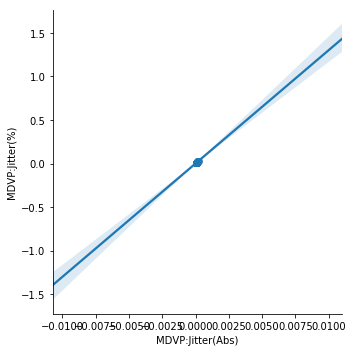

In [627]:
sns.lmplot(x ="MDVP:Jitter(Abs)", 
           y = "MDVP:Jitter(%)", data = park_df) 

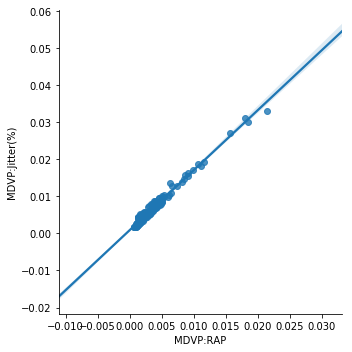

In [628]:
sns.lmplot(x ="MDVP:RAP", 
           y = "MDVP:Jitter(%)", data = park_df) 

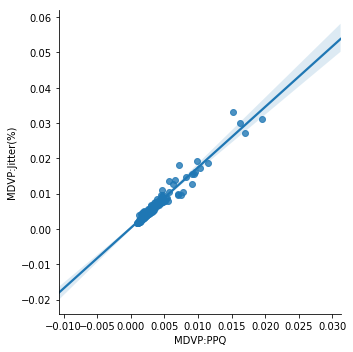

In [629]:
sns.lmplot(x ="MDVP:PPQ", 
           y = "MDVP:Jitter(%)", data = park_df) 

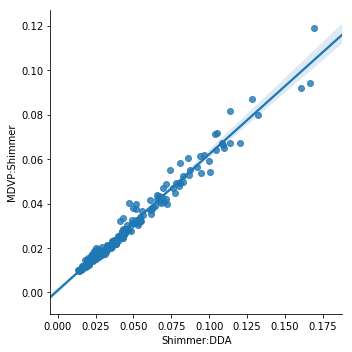

In [630]:
sns.lmplot(x ="Shimmer:DDA", 
           y = "MDVP:Shimmer", data = park_df) 

In [631]:
#4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
from sklearn.model_selection import train_test_split
X1=park_df.drop('status',axis=1)
target=park_df.pop('status')
X_train, X_test, y_train, y_test = train_test_split(X1, target, test_size=0.3,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

X_train      name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
49     49      122.964       130.049       114.676         0.00428   
180   180      150.440       163.441       144.736         0.00396   
102   102      139.224       586.567        66.157         0.03011   
151   151      192.818       224.429       168.793         0.03107   
91     91      151.955       163.335       147.226         0.00419   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
49            0.00003   0.00124   0.00155     0.00373       0.01681    ...      
180           0.00003   0.00206   0.00233     0.00619       0.02551    ...      
102           0.00022   0.01854   0.01628     0.05563       0.09419    ...      
151           0.00016   0.01800   0.01958     0.05401       0.11908    ...      
91            0.00003   0.00224   0.00227     0.00672       0.07959    ...      

     MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
49    0

In [632]:
#5.  Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [633]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [634]:
#6.Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
predict = dt_model.predict(X_test)
result = pd.DataFrame()
result["Observed"] = y_test 
result["Expected"] = predict 
result

,Observed,Expected
59,1,1
5,1,1
20,1,1
121,1,1
52,0,0
19,1,1
187,0,0
55,1,1
69,1,1
2,1,1


In [635]:
print('Score of train model',dt_model.score(X_train , y_train))
print('Score of test model',dt_model.score(X_test , y_test))

Score of train model 1.0
Score of test model 0.9491525423728814


In [636]:
#finding recall and confusion matrix
print(metrics.confusion_matrix(y_test, predict))
print(metrics.recall_score(y_test, predict))

[[13  3]
 [ 0 43]]
1.0


We obtained this result without tunning the hyper-parameters i.e without regularization parameters. Now, lets tune those parameters.

In [638]:
# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
#Calculating gini index
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                       Imp
name              0.245440
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.210204
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.047131
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.122984
RPDE              0.000000
DFA               0.000000
spread1           0.073894
spread2           0.000000
D2                0.025735
PPE               0.274612


In [639]:
#so prunning some data columns based on gini index
park_df=park_df.drop(['MDVP:Shimmer','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR' ,'HNR','DFA','spread2'],axis=1)
X2=park_df

In [640]:
X2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer(dB),RPDE,spread1,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.426,0.414783,-4.813031,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.626,0.458359,-4.075192,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.482,0.429895,-4.443179,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.517,0.434969,-4.117501,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.584,0.417356,-3.747787,2.332180,0.410335


In [641]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, target, test_size=0.3,random_state=10)
print ('X_train2 {}, \n y_train2 {}'.format(X_train2.head(),y_train2.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test2 {},\n y_test2 {}'.format(X_test2.head(),y_test2.head()))

X_train2      name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
49     49      122.964       130.049       114.676         0.00428   
180   180      150.440       163.441       144.736         0.00396   
102   102      139.224       586.567        66.157         0.03011   
151   151      192.818       224.429       168.793         0.03107   
91     91      151.955       163.335       147.226         0.00419   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer(dB)  \
49            0.00003   0.00124   0.00155     0.00373             0.154   
180           0.00003   0.00206   0.00233     0.00619             0.237   
102           0.00022   0.01854   0.01628     0.05563             0.930   
151           0.00016   0.01800   0.01958     0.05401             1.302   
91            0.00003   0.00224   0.00227     0.00672             0.772   

         RPDE   spread1        D2       PPE  
49   0.538688 -6.482096  2.054419  0.128872  
180  0.352396 -6.261446  2.

In [642]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=6,min_impurity_split=0.05,
                                   min_samples_leaf=5,splitter='best',random_state=1)

In [643]:
dt_model2.fit(X_train2, y_train2)

F:\Anaconda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=0.05,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [644]:
predict2 = dt_model2.predict(X_test2)
result = pd.DataFrame()
result["Observed"] = y_test2
result["Expected"] = predict2 
result

,Observed,Expected
59,1,1
5,1,1
20,1,1
121,1,1
52,0,0
19,1,1
187,0,0
55,1,1
69,1,1
2,1,1


In [646]:
print('Score of train model',dt_model2.score(X_train2 , y_train2))
print('Score of test model',dt_model2.score(X_test2 , y_test2))

Score of train model 0.9852941176470589
Score of test model 0.9661016949152542


In [647]:
print(metrics.confusion_matrix(y_test2, predict2))
print(metrics.recall_score(y_test2, predict2))

[[15  1]
 [ 1 42]]
0.9767441860465116


You can see with regularization model accuracy increases. Also, the recall_score is pretty good too.

In [648]:
#8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)
from sklearn.ensemble import RandomForestClassifier
rfcl_1 = RandomForestClassifier(n_estimators = 15,max_depth=5,random_state=1)
rfcl_1 = rfcl_1.fit(X_train, y_train)


In [649]:
predict_rfcl_1 = rfcl_1.predict(X_test)
print(rfcl_1.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, predict_rfcl_1))

0.9830508474576272
[[16  0]
 [ 1 42]]


So the optimal number of trees required are 15 to get the best result.